# Library Importations

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report   
from datetime import datetime
from textblob import TextBlob
from pypdf import PdfReader
import requests
import warnings
warnings.filterwarnings('ignore')

In [19]:
# common functions

def readCSV(file_path):
    df = pd.read_csv(file_path)
    return df
 
# Define a function to analyze sentiment using TextBlob
def analyzeSentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"


def describeData(df):
    print("--------------------")
    print(" OVERVIEW OF DATA ")
    print("--------------------")
    print(df.head())
    print("--------------------")
    print(" DATA TYPES ")
    print("--------------------")
    print(df.dtypes)
    print("--------------------")
    print(" DATAFRAME SHAPE ")
    print("--------------------")
    print(df.shape)

def summaryOfData(df):
    print("Statistical Summary of data")
    print(df.describe())

#  Checking for Outliers and Null Values

def  checkNullValues(df):
    print("Null Values Present in Data")
    print(df.isna().sum() * 100 / len(df))


# checking for outliers based on box plot and Inter Quartile Range

def checkOutliersIQR(df):
    Q1 = np.percentile(df, 25, method='midpoint')
    Q3 = np.percentile(df, 75, method='midpoint')
    IQR = Q3 - Q1
    print(f"Inter Quartile Range: {IQR}")

    # Calculating Lower & Upper Bounds
    lowerBound = Q1 - 1.5*IQR
    upperBound = Q3 + 1.5*IQR

    print(f"Lower Bound: {lowerBound}")
    print(f"Upper Bound: {upperBound}")


def checkOutliersBoxplot(df):
    sns.boxplot(df)


# Function to convert date string to desired format
def convert_date(date_string):
    date_object = datetime.strptime(date_string, "%d-%b-%y")
    formatted_date = date_object.strftime("%m-%d-%Y")
    return formatted_date

In [20]:
# Read Data
df = readCSV("https://raw.githubusercontent.com/JosephRidge/NSE_DATA/main/NSE_data_all_stocks_2021_upto_31dec2021.csv")
df.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,04-Jan-21,EGAD,Eaagads Ltd,8.2,14,12.5,12.5,12.5,12.5,-,-,"3,200",-
1,04-Jan-21,KUKZ,Kakuzi Plc,300,397,365,365,365,365,-,-,-,-
2,04-Jan-21,KAPC,Kapchorua Tea Kenya Plc,59,90,78,78,78,78,-,-,-,-
3,04-Jan-21,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,100,-
4,04-Jan-21,SASN,Sasini Plc,14.8,20,19.5,19.5,19.5,19.5,-,-,-,-


In [21]:
# Data types
print("\nData types:")
print(df.dtypes)



Data types:
DATE         object
CODE         object
NAME         object
12m Low      object
12m High     object
Day Low      object
Day High     object
Day Price    object
Previous     object
Change       object
Change%      object
Volume       object
Adjust       object
dtype: object


In [22]:
# Summary Of Data
summaryOfData(df)

Statistical Summary of data
             DATE   CODE         NAME 12m Low 12m High Day Low Day High  \
count       17746  17746        17746   17746    17746   17746    17746   
unique        250     71           71     413      437    3829     3759   
top     04-Jan-21   EGAD  Eaagads Ltd    6.00     5.00    4.12     0.45   
freq           71    250          250     365      252     253      252   

       Day Price Previous Change Change% Volume Adjust  
count      17746    17746  17746   17746  17746  17746  
unique      4063     4064   1318     919   4025      6  
top         4.12     4.12      -       -      -      -  
freq         257      257   6699    6704   6207  17740  


In [23]:
# Describe Data
describeData(df)

--------------------
 OVERVIEW OF DATA 
--------------------
        DATE  CODE                     NAME 12m Low 12m High Day Low Day High  \
0  04-Jan-21  EGAD              Eaagads Ltd     8.2       14    12.5     12.5   
1  04-Jan-21  KUKZ               Kakuzi Plc     300      397     365      365   
2  04-Jan-21  KAPC  Kapchorua Tea Kenya Plc      59       90      78       78   
3  04-Jan-21  LIMT           Limuru Tea Plc     360      475     360      360   
4  04-Jan-21  SASN               Sasini Plc    14.8       20    19.5     19.5   

  Day Price Previous Change Change% Volume Adjust  
0      12.5     12.5      -       -  3,200      -  
1       365      365      -       -      -      -  
2        78       78      -       -      -      -  
3       360      360      -       -    100      -  
4      19.5     19.5      -       -      -      -  
--------------------
 DATA TYPES 
--------------------
DATE         object
CODE         object
NAME         object
12m Low      object
12m H

In [24]:
# Check for null values
checkNullValues(df)

Null Values Present in Data
DATE         0.0
CODE         0.0
NAME         0.0
12m Low      0.0
12m High     0.0
Day Low      0.0
Day High     0.0
Day Price    0.0
Previous     0.0
Change       0.0
Change%      0.0
Volume       0.0
Adjust       0.0
dtype: float64


In [25]:
# Apply the function to the Date_Column and create a new column with the formatted dates
df["DATE"] = df["DATE"].apply(convert_date)
df.head()


,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,01-04-2021,EGAD,Eaagads Ltd,8.2,14,12.5,12.5,12.5,12.5,-,-,"3,200",-
1,01-04-2021,KUKZ,Kakuzi Plc,300,397,365,365,365,365,-,-,-,-
2,01-04-2021,KAPC,Kapchorua Tea Kenya Plc,59,90,78,78,78,78,-,-,-,-
3,01-04-2021,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,100,-
4,01-04-2021,SASN,Sasini Plc,14.8,20,19.5,19.5,19.5,19.5,-,-,-,-


In [26]:
# Extract the year from the dates 
df["Year"] = pd.to_datetime(df["DATE"], format='%m-%d-%Y').dt.year
df.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Year
0,01-04-2021,EGAD,Eaagads Ltd,8.2,14,12.5,12.5,12.5,12.5,-,-,"3,200",-,2021
1,01-04-2021,KUKZ,Kakuzi Plc,300,397,365,365,365,365,-,-,-,-,2021
2,01-04-2021,KAPC,Kapchorua Tea Kenya Plc,59,90,78,78,78,78,-,-,-,-,2021
3,01-04-2021,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,100,-,2021
4,01-04-2021,SASN,Sasini Plc,14.8,20,19.5,19.5,19.5,19.5,-,-,-,-,2021


In [27]:
# Filter data  
filtered_df = df[df["CODE"] == "LIMT"]
filtered_df.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Year
3,01-04-2021,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,100,-,2021
74,01-05-2021,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,-,-,2021
145,01-06-2021,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,-,-,2021
216,01-07-2021,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,-,-,2021
287,01-11-2021,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,-,-,2021


In [34]:
filtered_df.describe()

,Year
count,250.0
mean,2021.0
std,0.0
min,2021.0
25%,2021.0
50%,2021.0
75%,2021.0
max,2021.0


# Visualizations

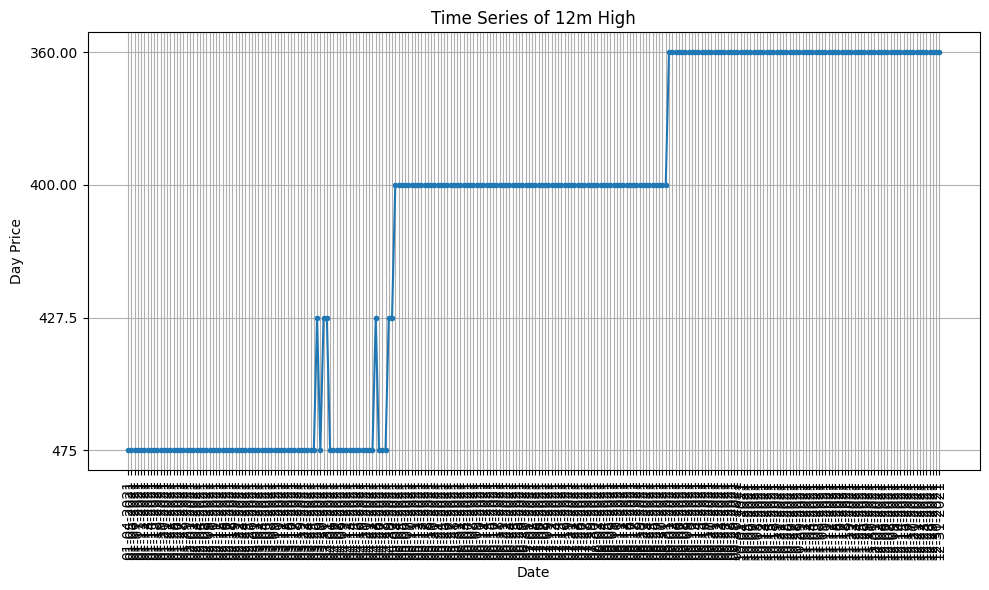

In [38]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["DATE"], filtered_df["12m High"], marker='.', linestyle='-')
plt.title("Time Series of 12m High")
plt.xlabel("Date")
plt.ylabel("Day Price")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

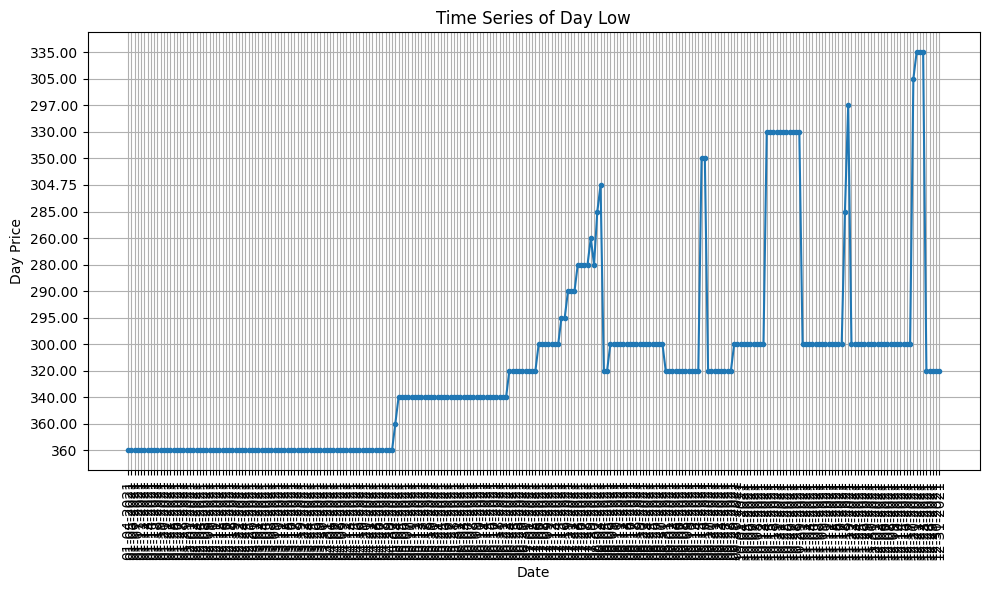

In [39]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["DATE"], filtered_df["Day Low"], marker='.', linestyle='-')
plt.title("Time Series of Day Low")
plt.xlabel("Date")
plt.ylabel("Day Price")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

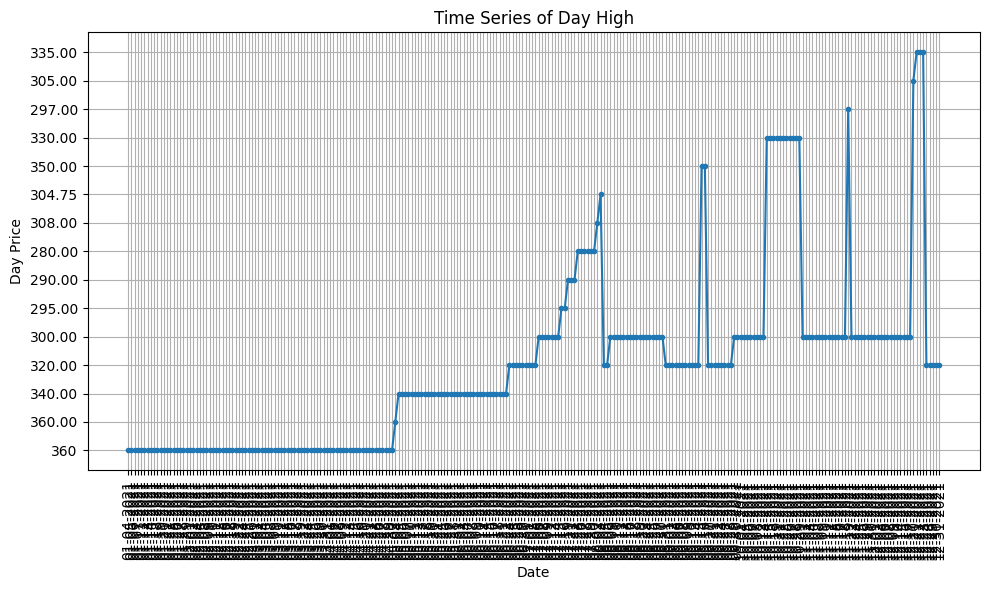

In [40]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["DATE"], filtered_df["Day High"], marker='.', linestyle='-')
plt.title("Time Series of Day High")
plt.xlabel("Date")
plt.ylabel("Day Price")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

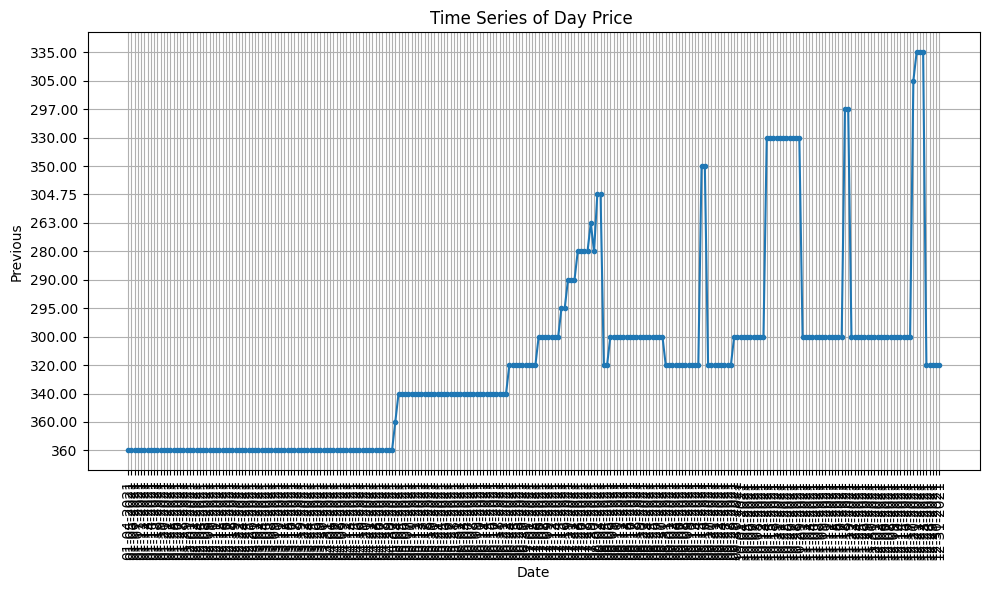

In [41]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["DATE"], filtered_df["Day Price"], marker='.', linestyle='-')
plt.title("Time Series of Day Price ")
plt.xlabel("Date")
plt.ylabel("Previous")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

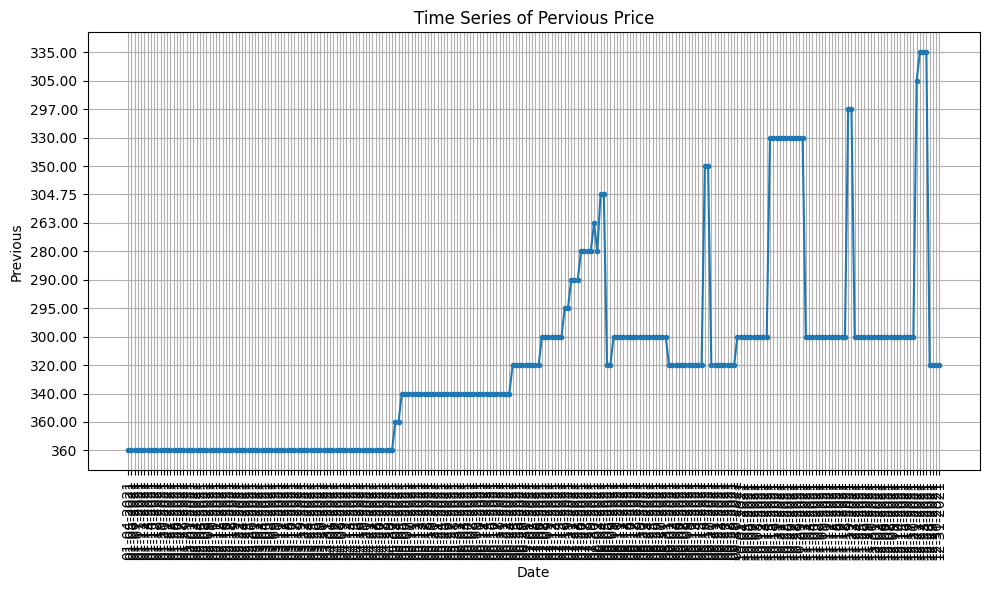

In [37]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["DATE"], filtered_df["Previous"], marker='.', linestyle='-')
plt.title("Time Series of Pervious Price")
plt.xlabel("Date")
plt.ylabel("Previous")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

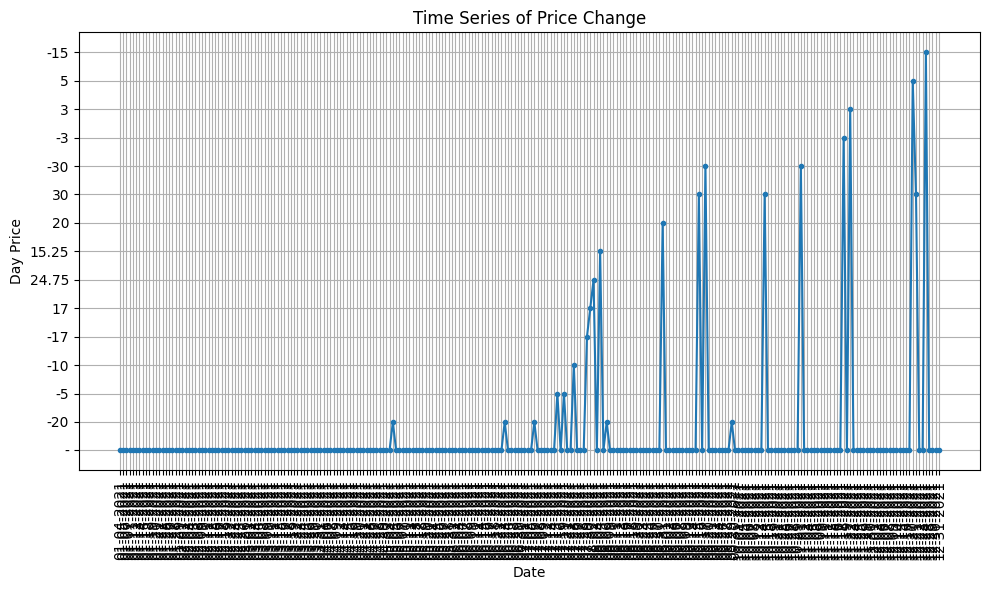

In [42]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["DATE"], filtered_df["Change"], marker='.', linestyle='-')
plt.title("Time Series of Price Change")
plt.xlabel("Date")
plt.ylabel("Day Price")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

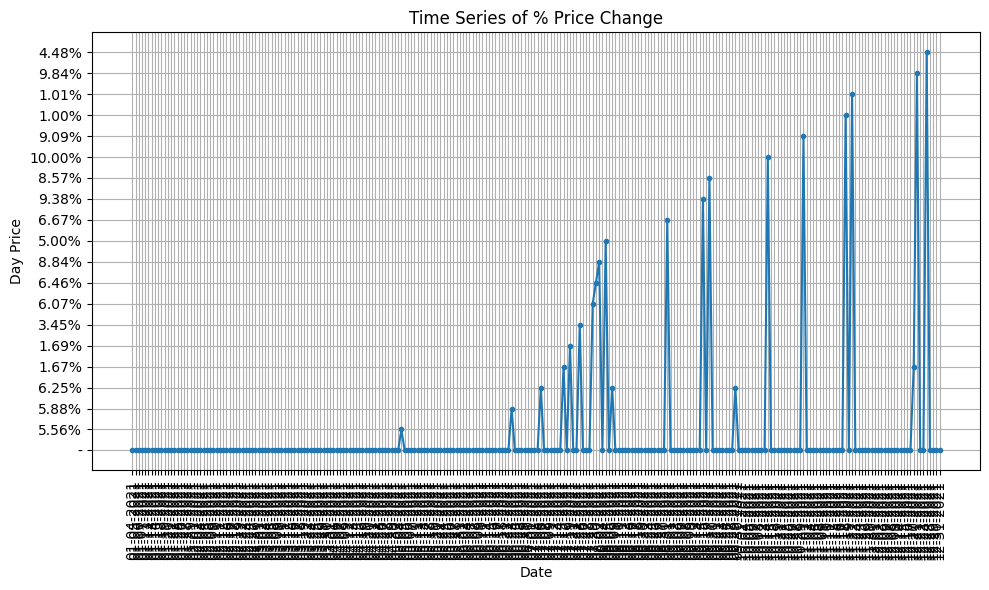

In [43]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["DATE"], filtered_df["Change%"], marker='.', linestyle='-')
plt.title("Time Series of % Price Change")
plt.xlabel("Date")
plt.ylabel("Day Price")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

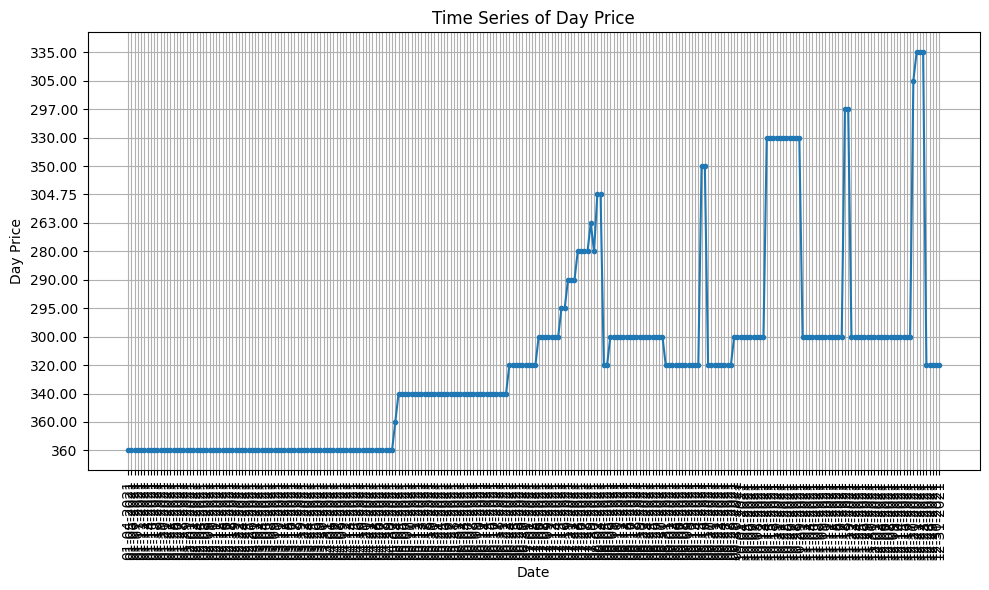

In [36]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["DATE"], filtered_df["Day Price"], marker='.', linestyle='-')
plt.title("Time Series of Day Price")
plt.xlabel("Date")
plt.ylabel("Day Price")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

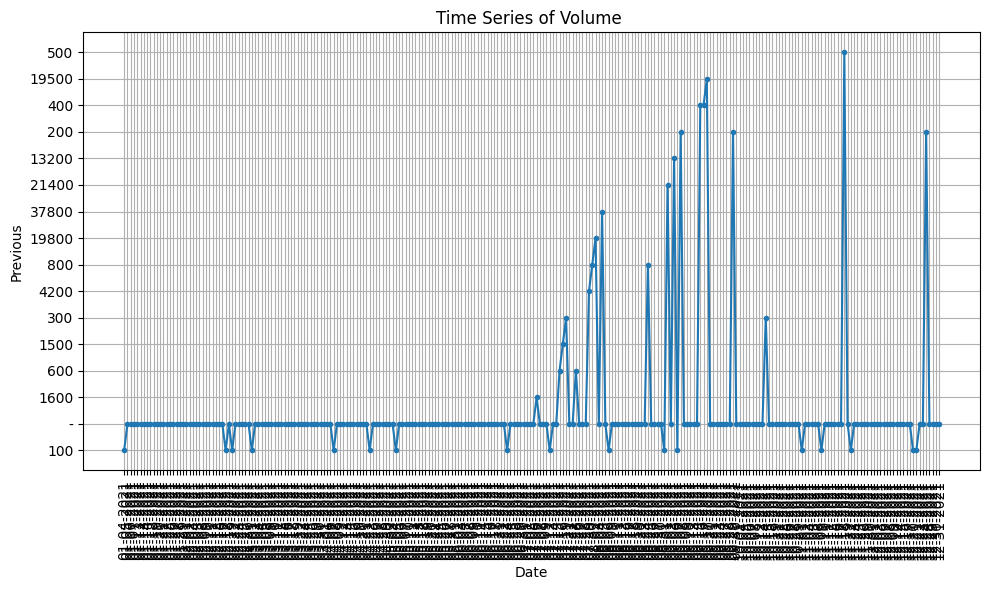

In [44]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["DATE"], filtered_df["Volume"], marker='.', linestyle='-')
plt.title("Time Series of Volume ")
plt.xlabel("Date")
plt.ylabel("Previous")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

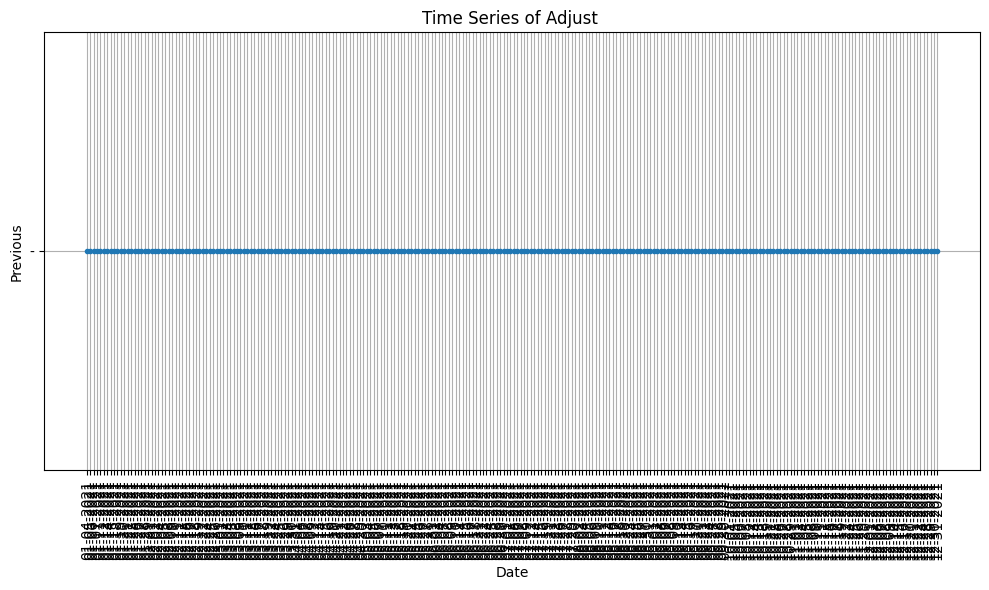

In [45]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["DATE"], filtered_df["Adjust"], marker='.', linestyle='-')
plt.title("Time Series of Adjust ")
plt.xlabel("Date")
plt.ylabel("Previous")
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Sentiment Analysis

In [30]:
# Open the PDF file
with open('./limuru-tea-plc-financial-statements-2022.pdf', 'rb') as file:
    # Create a PDF reader object
    pdf_reader = PdfReader(file)
    number_of_pages = len(pdf_reader.pages)
    # Extract text from each page of the PDF
    text = ''
    for page_num in range(number_of_pages):# pdf_reader.pages:
        page = pdf_reader.pages[page_num]
        text += page.extract_text()



In [31]:
print(text)

 
 
  
 
 
 
LIMURU TEA PLC 
 
ANNUAL REPORT AND FINANCIAL STATEMENTS 
 
AS AT 
 
31 DECEMBER 2022 
 
 
 

	

 
 
 LIMURU TEA PLC 
 
ANNUAL REPORT AND FINANCIAL STATEMENTS 
FOR THE YEAR ENDED 31 DECEMBER 2022 
 
Table of contents Page 
 
Corporate information 1 
 
Notice of annual general meeting 2 – 3 
 
Chair’s statement  4 – 6 
 
Report of the directors  7 – 8 
 
Directors’ remuneration report  9 – 11  
Board of Directors and Directors’ profiles 12 – 14 
 
Sustainability report 15 – 20 
 
Corporate governance 21 – 23 
 
Governance Audit Report 24 – 25 
 
Statement of directors’ responsibilities 26 
 
Independent Auditor’s Report  27 – 30 
 
Statement of profit or loss and other comprehensive income 31 
 Statement of financial position 32 
 
Statement of changes in equity 33 
 
Statement of cash flows 34 
 
Notes to the financial statements  35 – 67 
 
Principal shareholders and share distribution schedule 68 
 
Proxy form 69 – 70 


In [32]:
# Sentiment Analysis to extracted text
sentiment = analyzeSentiment(text)
print("Sentiment of the PDF document:", sentiment)

Sentiment of the PDF document: Positive
